<a href="https://colab.research.google.com/github/DiegoSVBrito/Projects-/blob/main/outliers_estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Breve Explicação e Contexto

## A análise de dados utiliza diversas medidas de tendência central para resumir um conjunto de dados:

# - **Média**: A soma de todos os valores dividida pelo número total de elementos.
# - **Mediana**: O valor central de um conjunto de dados ordenado, representando o ponto médio.
# - **Moda**: O valor que mais se repete no conjunto de dados.
# Estas medidas são complementadas por métricas de dispersão (como desvio padrão e intervalo interquartil)
# que ajudam a entender a variabilidade dos dados e identificar valores extremos (outliers).

In [3]:
!pip install liac-arff

# Importando bibliotecas
import arff
import pandas as pd

# Carregando o arquivo ARFF
from google.colab import files
uploaded = files.upload()  # Faça o upload do arquivo ARFF aqui

# Lendo o arquivo ARFF
file_name = list(uploaded.keys())[0]
with open(file_name, 'r') as file:
    dataset = arff.load(file)

# Convertendo para um DataFrame do Pandas
data = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Exibindo as primeiras linhas do dataset
print(data.head())

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=d331780e5ff54c2386d432cf9cb38ba3aaf5c3e645a21296d025fa26baea6c5a
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


Saving ALOI.arff to ALOI.arff
  outlier      att1      att2  att3      att4  att5  att6  att7  att8  att9  \
0     yes  0.872812  0.000005   0.0  0.000036   0.0   0.0   0.0   0.0   0.0   
1     yes  0.975206  0.000000   0.0  0.000651   0.0   0.0   0.0   0.0   0.0   
2     yes  0.963777  0.000000   0.0  0.002005   0.0   0.0   0.0   0.0   0.0   
3     yes  0.973246  0.000000   0.0  0.000556   0.0   0.0   0.0   0.0   0.0   
4     yes  0.960720  0.000000   0.0  0.000656   0.0   0.0   0.0   0.0   0.0   

   ...     att19     att20  att21     att22     att23     att24     att25  \
0  ...  0.014212  0.000104    0.0  0.025490  0.004937  0.000011  0.000054   
1  ...  0.000000  0.000000    0.0  0.004853  0.001582  0.000000  0.000000   
2  ...  0.000000  0.000000    0.0  0.007828  0.002523  0.000000  0.000393   
3  ...  0.000000  0.000000    0.0  0.004392  0.000170  0.000000  0.000000   
4  ...  0.000000  0.000000    0.0  0.010299  0.000561  0.000000  0.000084   

      att26     att27   id  
0  

In [5]:
# Vamos verificar se há dados nulos no dataset
print(data.isnull().sum())


outlier    0
att1       0
att2       0
att3       0
att4       0
att5       0
att6       0
att7       0
att8       0
att9       0
att10      0
att11      0
att12      0
att13      0
att14      0
att15      0
att16      0
att17      0
att18      0
att19      0
att20      0
att21      0
att22      0
att23      0
att24      0
att25      0
att26      0
att27      0
id         0
dtype: int64


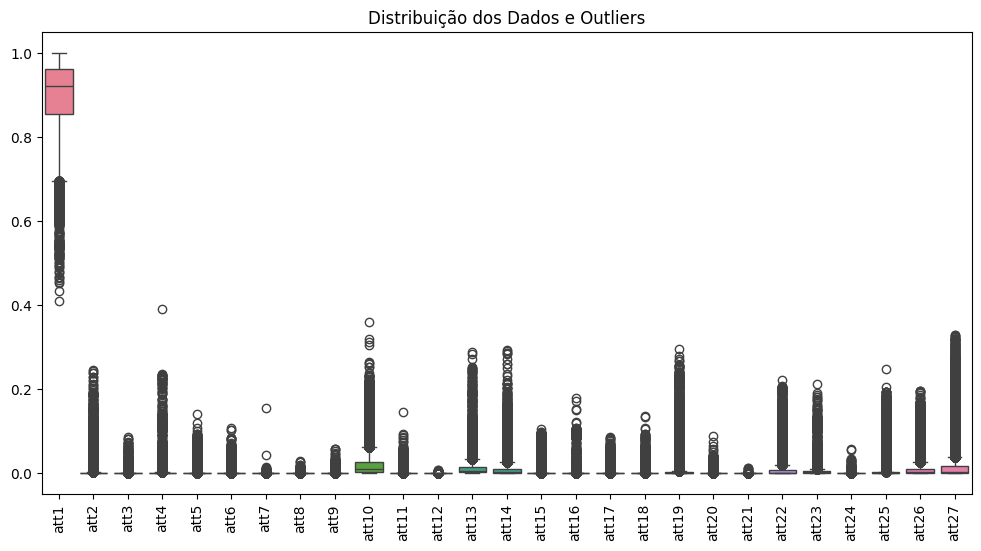

In [6]:
# Agora vamos usar algo mais visual para uma primeira prospecção de Outliers.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=data.drop(columns=["outlier", "id"]))  # Removemos a coluna "outlier" e "id" se forem categóricas
plt.xticks(rotation=90)  # Rotaciona os nomes das colunas se necessário
plt.title("Distribuição dos Dados e Outliers")
plt.show()

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando outliers
outliers = (data < lower_bound) | (data > upper_bound)
print("Número de outliers por coluna:\n", outliers.sum())


TypeError: unsupported operand type(s) for -: 'str' and 'str'